#Download YouTube Video's Audio

In [1]:
! pip install pytube -q #For downloading video on a specific quality

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.2 MB/s eta 0:00:00


In [2]:
from pytube import YouTube #The YouTube class from the pytube library provides methods for interacting with YouTube video

In [3]:
VIDEO_URL = "https://www.youtube.com/watch?v=hWLf6JFbZoo" #obama

In [4]:
yt = YouTube(VIDEO_URL) #save video to variable yt 

In [5]:
yt.streams.filter(only_audio = True, file_extension = 'mp4').first().download(filename = 'ytaudio.mp4') #download mp4 audio from the video and save the file

'/content/ytaudio.mp4'

In [6]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav #used to convert the audio file using the FFmpeg tool

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

#English ASR with HuggingSound

In [7]:
!pip install huggingsound -q 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from huggingsound import SpeechRecognitionModel #To perform speach recognition tasks


In [9]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu" #to ensure it is running in gpu for a better runtime

In [10]:
device #it is runnning in gpu

'cuda'

In [11]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device) #import english lang from SpeecRecognitionModel


INFO:huggingsound.speech_recognition.model:Loading model...


#Audio Chunking

In [12]:
import librosa #It is a Python library for analyzing and manipulating audio data

In [13]:
input_file = '/content/ytaudio.wav' #import the extracted audio to input_file

In [14]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000, #size of the frames
    hop_length=16000    #the number of samples between the start of one frame and the start of the next.
)

16000


In [15]:
import soundfile as sf #library for reading and writing audio files

In [16]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [17]:
i

6

#Audio Transcription / ASR / Speech to Text

In [18]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/{a}.wav') 

In [19]:
audio_path

['/content/0.wav',
 '/content/1.wav',
 '/content/2.wav',
 '/content/3.wav',
 '/content/4.wav',
 '/content/5.wav',
 '/content/6.wav']

In [20]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


In [21]:
full_transcript = ' '

In [22]:
for item in transcriptions:
  full_transcript += ''.join(item['transcription'])

In [23]:
full_transcript

" for even as we celebrate tonight we know the challenges that tomorrow will bring are the greatest imorlitai stand here knowing that my story is part of the larger american story ti owe a debt to all of those who came before me and that in no other country on earth is my story even possibleiam a sonablackman from kenya and white woman from kansas i am married to a black american who carries within her the blood of slaves and slave ownersi have brothers sisters nieces nephew's uncles and cousins of every race and every hugh scattered across three continents these people are part of meand they are part of america this county that i lovei've come here to cairoto seek a new beginning between the united states and muslims around the worldone based on mutual interest and mutual respect just as muslims do not fit a cruidstereotype america is not the cruidstereotype of a self-interested empireto say that force may sometimes be necessary is not a call to synicism it is a recognition of history

#Text Summarization

In [24]:
from transformers import pipeline

In [25]:
summarization = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [26]:
summarized_text = summarization(full_transcript)

In [27]:
summarized_text[0]['summary_text']

' In no other country on earth is my story even possible, President Barack Obama says . Obama says he is more optimistic about the future of America than he is optimistic about its future . Obama: "Even as we celebrate tonight we know the challenges that tomorrow will bring are the greatest imorlitai stand here knowing that my story is part of the larger american story"'

###Text Chunking before Summarization

In [28]:
num_iters = int(len(full_transcript)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  #print("input text \n" + full_transcript[start:end])
  out = summarization(full_transcript[start:end], min_length = 5, max_length=20)
  out = out[0]
  out = out['summary_text']
 # print("Summarized text\n"+out)
  summarized_text.append(out)

print(summarized_text)

[' i owe a debt to all of those who came before me and that in no other', ' We honor the courage of ordinary americans willing to endure billy clots and rod', ' The latest interviews show highlights and digital exclusives from our outube channel . Subscribe to']


##Evaluation Metrics

In [29]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from rouge import Rouge
rouge = Rouge()

# generate the summary using the code you provided
generated_summary = summarization(full_transcript)[0]['summary_text']

# calculate the ROUGE scores
scores = rouge.get_scores(generated_summary, full_transcript)
rouge_1_recall = scores[0]['rouge-1']['r']
rouge_1_precision = scores[0]['rouge-1']['p']
rouge_1_f1_score = scores[0]['rouge-1']['f']
rouge_2_recall = scores[0]['rouge-2']['r']
rouge_2_precision = scores[0]['rouge-2']['p']
rouge_2_f1_score = scores[0]['rouge-2']['f']
rouge_l_recall = scores[0]['rouge-l']['r']
rouge_l_precision = scores[0]['rouge-l']['p']
rouge_l_f1_score = scores[0]['rouge-l']['f']

# print the ROUGE scores
print("ROUGE-1 recall: ", rouge_1_recall)
print("ROUGE-1 precision: ", rouge_1_precision)
print("ROUGE-1 F1 score: ", rouge_1_f1_score)
print("ROUGE-2 recall: ", rouge_2_recall)
print("ROUGE-2 precision: ", rouge_2_precision)
print("ROUGE-2 F1 score: ", rouge_2_f1_score)
print("ROUGE-L recall: ", rouge_l_recall)
print("ROUGE-L precision: ", rouge_l_precision)
print("ROUGE-L F1 score: ", rouge_l_f1_score)

ROUGE-1 recall:  0.1446280991735537
ROUGE-1 precision:  0.7446808510638298
ROUGE-1 F1 score:  0.24221453014834593
ROUGE-2 recall:  0.10743801652892562
ROUGE-2 precision:  0.6610169491525424
ROUGE-2 F1 score:  0.18483412081747944
ROUGE-L recall:  0.1446280991735537
ROUGE-L precision:  0.7446808510638298
ROUGE-L F1 score:  0.24221453014834593


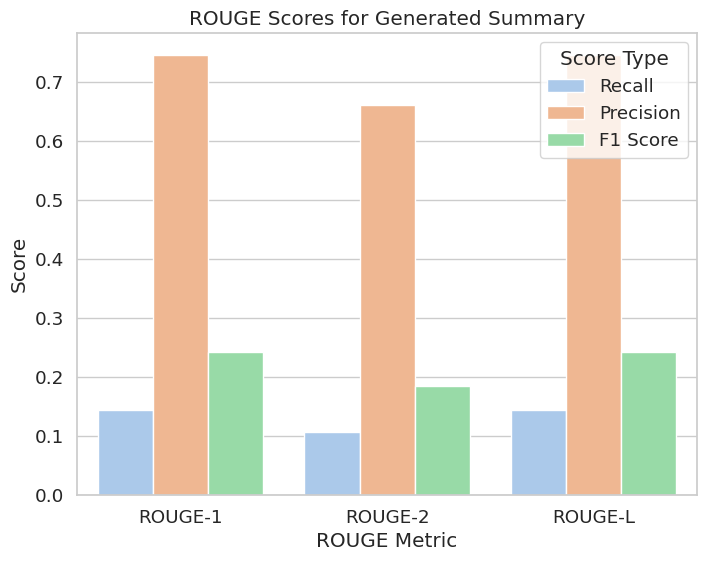

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the ROUGE metrics and scores
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
recall_scores = [rouge_1_recall, rouge_2_recall, rouge_l_recall]
precision_scores = [rouge_1_precision, rouge_2_precision, rouge_l_precision]
f1_scores = [rouge_1_f1_score, rouge_2_f1_score, rouge_l_f1_score]

# Create a pandas DataFrame with the scores
df = pd.DataFrame({'Metric': metrics, 'Recall': recall_scores, 'Precision': precision_scores, 'F1 Score': f1_scores})

# Reshape the DataFrame to long format for visualization
df_long = pd.melt(df, id_vars=['Metric'], var_name='Score Type', value_name='Score')

# Set up the figure
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scores as a bar plot with colored bars
sns.barplot(x='Metric', y='Score', hue='Score Type', data=df_long, ax=ax, palette='pastel')

# Add labels, titles, and legend
ax.set_xlabel('ROUGE Metric')
ax.set_ylabel('Score')
ax.set_title('ROUGE Scores for Generated Summary')
ax.legend(title='Score Type', loc='upper right')

# Show the plot
plt.show()
